#  ***Task 9: Business Insights & Executive Report for E-Commerce Dataset*** 
# ___________________________________________________________________________________________-

#### **This task focuses on analyzing an e-commerce dataset to uncover meaningful business insights that can drive strategic decision-making. By exploring customer behavior, sales performance, and market trends, the objective is to highlight key patterns that impact growth. The executive report will summarize these findings in a concise, decision-oriented manner, making it easier for stakeholders to understand opportunities, challenges, and actionable recommendations.**

In [ ]:
# Import Libaries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


# Display requirements
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

> Import Data
> 

In [145]:
# Load datasets
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')   # Needed for linking
sellers = pd.read_csv('olist_sellers_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

# Merge step by step
df = (customers
      .merge(orders, on='customer_id', how='left')
      .merge(order_items, on='order_id', how='left')
      .merge(sellers, on='seller_id', how='left')
      .merge(products, on='product_id', how='left'))

df.head()

# Save the Dataset
df.to_csv('ecommerce_data.csv', index=False)

# Exploring dataset

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113425 non-null  object 
 1   customer_unique_id             113425 non-null  object 
 2   customer_zip_code_prefix       113425 non-null  int64  
 3   customer_city                  113425 non-null  object 
 4   customer_state                 113425 non-null  object 
 5   order_id                       113425 non-null  object 
 6   order_status                   113425 non-null  object 
 7   order_purchase_timestamp       113425 non-null  object 
 8   order_approved_at              113264 non-null  object 
 9   order_delivered_carrier_date   111457 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  113425 non-null  object 
 12  order_item_id                 

In [147]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contains 113425 rows and 29 columns


In [148]:
# Unique Values in each column
print(df.nunique())

customer_id                      99441
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
order_id                         99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
seller_zip_code_prefix            2246
seller_city                        611
seller_state                        23
product_category_name               73
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g         

> #### **1. Conduct a full-cycle analysis on an e-commerce dataset**

> #### **2.  Clean and preprocess sales, product, and customer data**

> # -------  Data Preprocessing ------
# _________________________________________________________________________________

In [149]:
# Checking Missing values (percent)
miss_pertcentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print("Missing % (top 20):\n", miss_pertcentage)

Missing % (top 20):
 order_delivered_customer_date    2.846815
product_category_name            2.096540
product_name_lenght              2.096540
product_description_lenght       2.096540
product_photos_qty               2.096540
order_delivered_carrier_date     1.735067
product_length_cm                0.699140
product_height_cm                0.699140
product_width_cm                 0.699140
product_weight_g                 0.699140
order_item_id                    0.683271
seller_city                      0.683271
seller_state                     0.683271
price                            0.683271
shipping_limit_date              0.683271
seller_zip_code_prefix           0.683271
freight_value                    0.683271
seller_id                        0.683271
product_id                       0.683271
order_approved_at                0.141944
order_estimated_delivery_date    0.000000
customer_id                      0.000000
order_id                         0.000000
order_status 

In [150]:
# --- Standardize column names ---
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

In [151]:
# --- Convert timestamps ---
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date"
]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

> #### --- Handle missing values ---

In [152]:
# Fill product_category_name missing with 'unknown'
df["product_category_name"] = df["product_category_name"].fillna("unknown")

In [153]:
# Fill numeric product features with median
num_cols = [
    "product_weight_g", "product_length_cm",
    "product_height_cm", "product_width_cm",
    "product_name_lenght", "product_description_lenght",
    "product_photos_qty"
]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [154]:
# Fill NaN order_item_id with -1 (invalid flag)
df["order_item_id"] = df["order_item_id"].fillna(-1)

In [155]:
# --- Remove duplicates ---
df = df.drop_duplicates(subset=["order_id", "product_id", "seller_id"], keep="first")

In [156]:
# Check for remaining missing values
print(df.isnull().sum())


customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1802
order_delivered_customer_date    3005
order_estimated_delivery_date       0
order_item_id                       0
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
seller_zip_code_prefix            775
seller_city                       775
seller_state                      775
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_leng

In [157]:
# cleaned whole dataset
df.dropna(inplace=True)

# Remove duplicates if any
df = df.drop_duplicates()

> #####  --- Feature engineering ---

In [158]:
df["gross_revenue"] = df["price"].fillna(0) + df["freight_value"].fillna(0)
df["delivery_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
df["delivery_delay_days"] = (df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]).dt.days
df["is_late_delivery"] = df["delivery_delay_days"] > 0
df["is_delivered"] = df["order_status"] == "delivered"


In [159]:
# --- Check final dataset health ---
print("Missing values per column:\n", df.isnull().sum())
print("\nShape after cleaning:", df.shape)

Missing values per column:
 customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm          

In [160]:
# Core counts
rows = len(df)
unique_orders = df["order_id"].nunique()
unique_customers = df["customer_id"].nunique()
unique_products = df["product_id"].nunique()
unique_sellers = df["seller_id"].nunique()



In [161]:
# Revenue
total_revenue = df.groupby("order_id")["gross_revenue"].sum().sum()
aov = df.groupby("order_id")["gross_revenue"].sum().mean()
# Average order value (AOV)

print(total_revenue)
print(aov)

14407551.22
149.36141259161735


In [162]:
# Delivery stats
delivered_orders = df[df["is_delivered"]]
delivery_rate = delivered_orders["order_id"].nunique() / unique_orders * 100
avg_delivery_days = delivered_orders["delivery_days"].mean()
late_delivery_rate = delivered_orders["is_late_delivery"].mean() * 100


print(delivery_rate)
print(avg_delivery_days)
print(late_delivery_rate)

99.9937798695846
12.030277619717888
6.652491190240884


##### *Executive Summary*

In [163]:
print("Rows:", rows)
print("Unique Orders:", unique_orders)
print("Unique Customers:", unique_customers)
print("Unique Products:", unique_products)
print("Unique Sellers:", unique_sellers)
print("Total Gross Revenue:", round(total_revenue,2))
print("AOV:", round(aov,2))
print("Delivery Rate:", round(delivery_rate,1), "%")
print("Avg Delivery Days:", round(avg_delivery_days,2))
print("Late Delivery Rate:", round(late_delivery_rate,1), "%")

Rows: 100180
Unique Orders: 96461
Unique Customers: 96461
Unique Products: 32210
Unique Sellers: 2970
Total Gross Revenue: 14407551.22
AOV: 149.36
Delivery Rate: 100.0 %
Avg Delivery Days: 12.03
Late Delivery Rate: 6.7 %


> #### **3.  Perform EDA and segmentation, visualize patterns, and generate actionable business insights** 

### Exploratory Data Analysis

In [164]:
# Top product categories, sellers, states
print("\nTop 10 categories by revenue:\n",
      df.groupby("product_category_name")["gross_revenue"].sum().sort_values(ascending=False).head(5))
print("\nTop 10 sellers by revenue:\n",
      df.groupby("seller_id")["gross_revenue"].sum().sort_values(ascending=False).head(5))
print("\nTop 10 states by orders:\n",
      df.groupby("customer_state")["order_id"].nunique().sort_values(ascending=False).head(5))


Top 10 categories by revenue:
 product_category_name
beleza_saude              1358015.75
relogios_presentes        1243838.94
cama_mesa_banho           1135875.07
esporte_lazer             1047655.25
informatica_acessorios     912450.42
Name: gross_revenue, dtype: float64

Top 10 sellers by revenue:
 seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    244711.21
4a3ca9315b744ce9f8e9374361493884    220336.32
53243585a1d6dc2643021fd1853d8905    214890.19
fa1c13f2614d7b5c4749cbc52fecda94    200833.50
7c67e1448b00f6e969d365cea6b010ab    180332.60
Name: gross_revenue, dtype: float64

Top 10 states by orders:
 customer_state
SP    40489
RJ    12351
MG    11352
RS     5342
PR     4923
Name: order_id, dtype: int64


#### **Most selling product_category:**
##### 1. The beleza_saude (beauty & health) category leads revenue at 1.36M, showing strong consumer demand in personal care.

##### 2. Relogios_presentes (watches & gifts) and cama_mesa_banho (bed, table, bath) follow closely, highlighting lifestyle and household spending patterns.

#### **Seller_ID who generate highest revenue:**

#### The top seller (4869f7a5dfa277a7dca6462dcf3b52b2) alone generates 244711.21 revenue.

> ## Visualize  Monthly revenue and number of orders

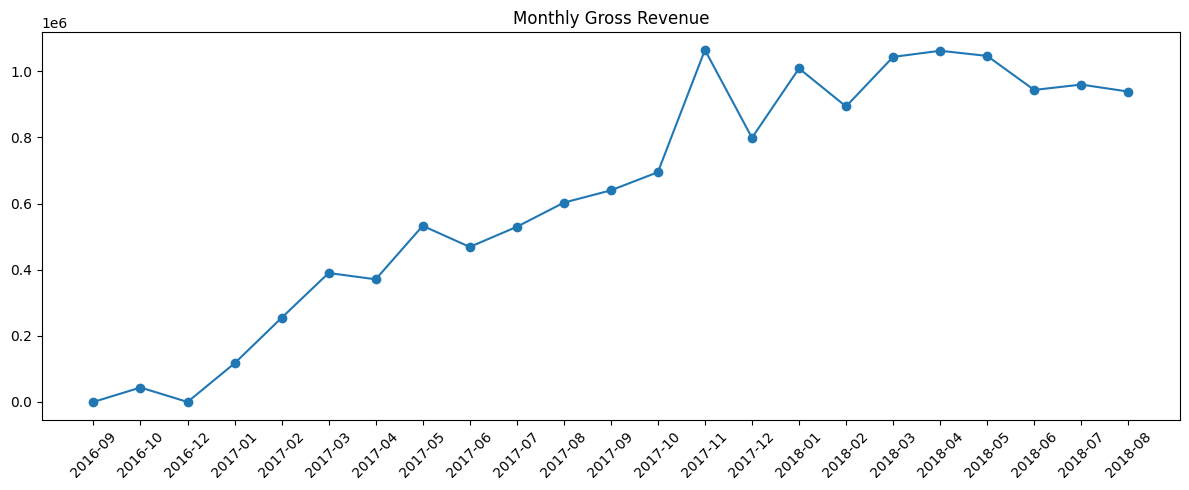

In [165]:
# Time series (Line chart)— monthly revenue & number of orders
monthly = (df.groupby(df["order_purchase_timestamp"].dt.to_period("M").astype(str))
             .agg(gross_revenue=("gross_revenue", "sum"),
                  orders=("order_id", "nunique"))
             .reset_index())
monthly['order_month'] = monthly['order_purchase_timestamp'] if 'order_purchase_timestamp' in monthly.columns else monthly.iloc[:,0]

plt.figure(figsize=(12,5))
plt.plot(monthly.iloc[:,0], monthly['gross_revenue'], marker='o')
plt.title("Monthly Gross Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

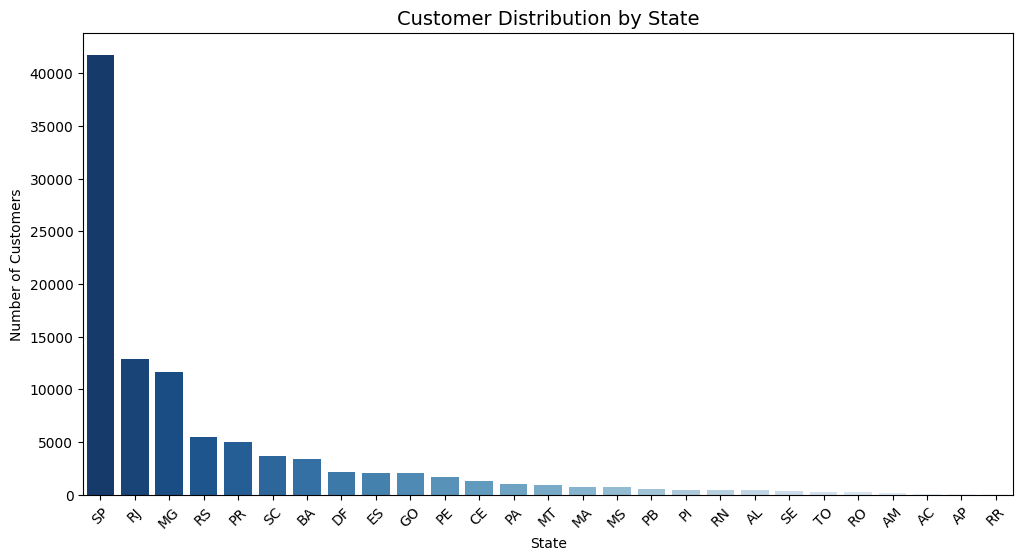

In [166]:
# --- 1. Customer distribution by state ---
customer_state_counts = customers['customer_state'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=customer_state_counts.index, y=customer_state_counts.values, palette="Blues_r")
plt.title("Customer Distribution by State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

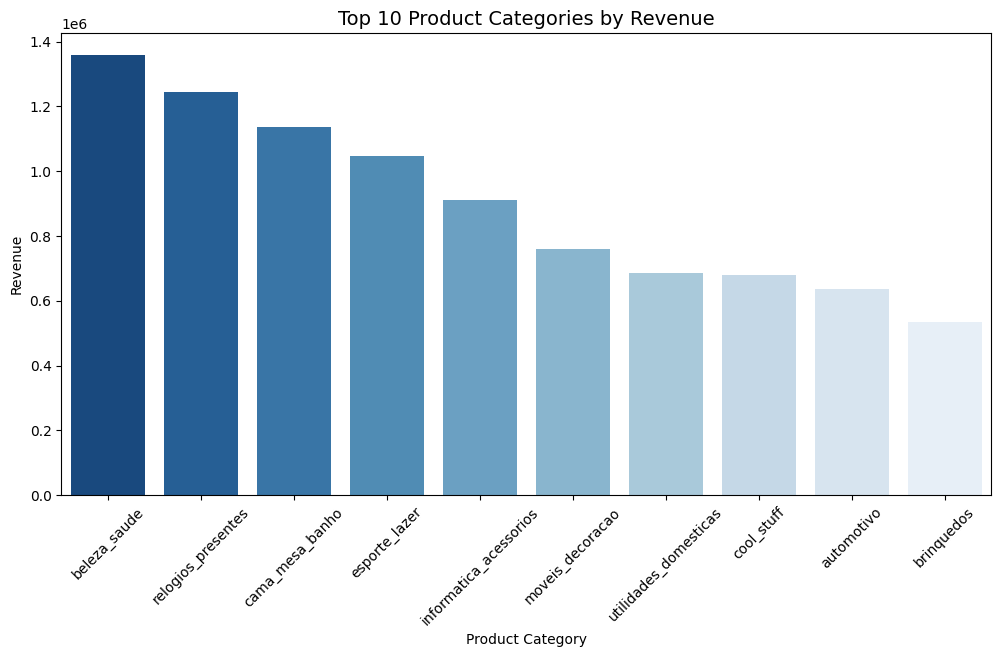

In [167]:
# --- 2. Top product categories by revenue ---
category_revenue = df.groupby('product_category_name')['gross_revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))   
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="Blues_r")
plt.title("Top 10 Product Categories by Revenue", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

> ## Delivery performance 

In [168]:
# Delivery KPIs
delivery = df.loc[df['is_delivered']]
print("Delivery rate:", delivery['order_id'].nunique() / df['order_id'].nunique())
print("Median delivery days:", delivery['delivery_days'].median())
print("90th percentile delivery days:", delivery['delivery_days'].quantile(0.90))
print("Late delivery rate (delivered orders):", (delivery['is_late_delivery'].mean()))

Delivery rate: 0.999937798695846
Median delivery days: 10.0
90th percentile delivery days: 23.0
Late delivery rate (delivered orders): 0.06652491190240883


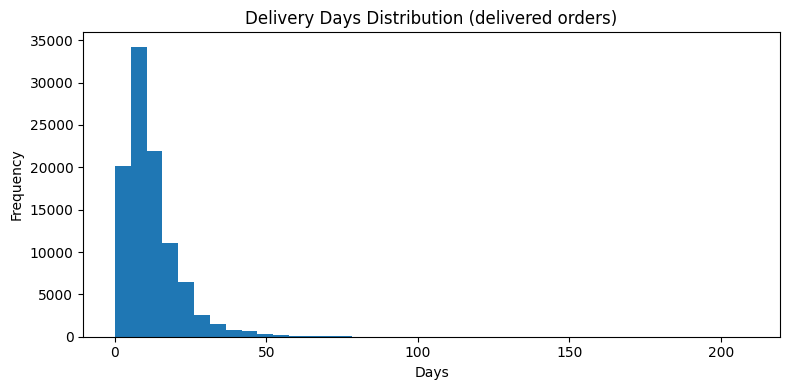

In [169]:
# Plot delivery day distribution
plt.figure(figsize=(8,4))
plt.hist(delivery['delivery_days'].dropna(), bins=40)
plt.title("Delivery Days Distribution (delivered orders)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

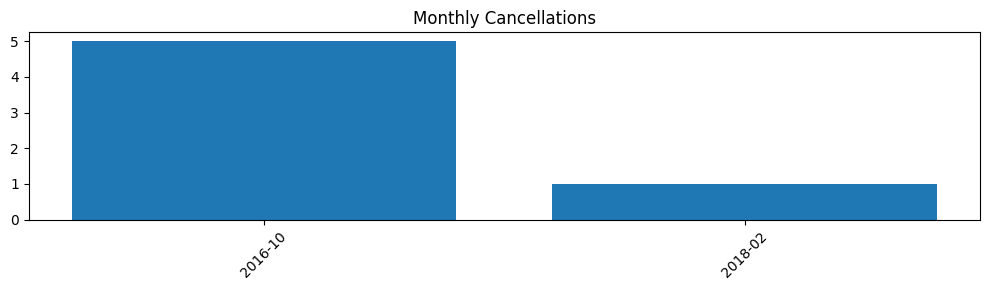

In [170]:
# Cancellations by month
if "canceled" in df['order_status'].unique():
    canc = df[df['order_status']=='canceled'].groupby(df['order_purchase_timestamp'].dt.to_period("M").astype(str)).agg(canceled_orders=('order_id','nunique')).reset_index()
    plt.figure(figsize=(10,3))
    plt.bar(canc.iloc[:,0], canc['canceled_orders'])
    plt.title("Monthly Cancellations")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

> ### RFM for segmentation

In [171]:
# RFM at customer_unique_id level (or customer_id if unique id not present)
customer_col = "customer_unique_id" if "customer_unique_id" in df.columns else "customer_id"
today = df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm = df.groupby(customer_col).agg(
    recency_days = ("order_purchase_timestamp", lambda x: (today - x.max()).days),
    frequency = ("order_id", "nunique"),
    monetary = ("gross_revenue", "sum")
).reset_index()

In [172]:

# handle zeros and NaNs
rfm = rfm[(rfm['monetary'] > 0) & (rfm['frequency'] > 0)]

# create RFM quartiles
rfm['r_quartile'] = pd.qcut(rfm['recency_days'], 4, labels=[4,3,2,1]).astype(int)  # lower recency better => higher score
rfm['f_quartile'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, labels=[1,2,3,4]).astype(int)
rfm['rfm_score'] = rfm['r_quartile'].astype(str) + rfm['f_quartile'].astype(str) + rfm['m_quartile'].astype(str)


In [173]:
# Map some segments (example)
def rfm_segment(row):
    r,f,m = row['r_quartile'], row['f_quartile'], row['m_quartile']
    if r>=3 and f>=3 and m>=3:
        return 'Champions'
    if r>=3 and f>=2:
        return 'Loyal'
    if r<=2 and f>=3:
        return 'At Risk/Needs Attention'
    return 'Others'

rfm['segment'] = rfm.apply(rfm_segment, axis=1)

In [174]:

# Profile segments
profile = rfm.groupby('segment').agg(
    customers=('customer_unique_id' if 'customer_unique_id' in rfm.columns else customer_col, 'nunique'),
    avg_recency=('recency_days','mean'),
    avg_frequency=('frequency','mean'),
    avg_monetary=('monetary','mean')
).reset_index()
print(profile.sort_values('avg_monetary', ascending=False))

                   segment  customers  avg_recency  avg_frequency  \
1                Champions      12233   112.211968       1.130058   
0  At Risk/Needs Attention      23180   364.070751       1.058240   
3                   Others      34992   280.954304       1.000000   
2                    Loyal      22937   111.855910       1.007760   

   avg_monetary  
1    251.910677  
0    155.941728  
3    150.329039  
2    106.852898  


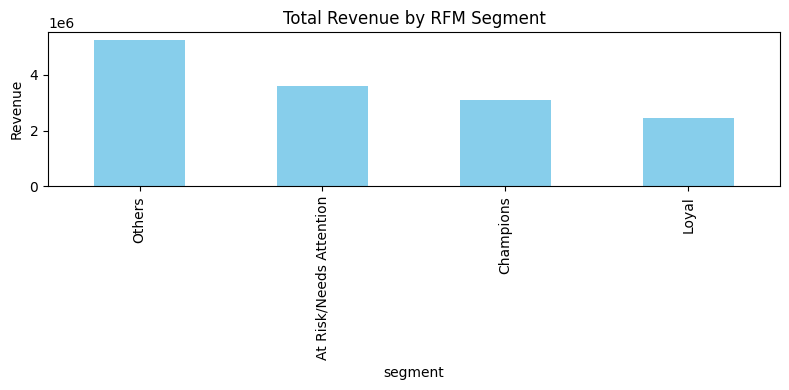

In [175]:
# Revenue by segment (quartiles)
seg_revenue = rfm.merge(df[[customer_col,'gross_revenue']], on=customer_col).groupby('segment')['gross_revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
seg_revenue.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by RFM Segment")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

> ## Actionable business insights

In [176]:
# Example rules to extract insights
insights = []

# 6.1 High concentration categories
top_cats = df.groupby('product_category_name')['gross_revenue'].sum().nlargest(5)
insights.append("Top 5 categories by revenue: " + ", ".join(top_cats.index.tolist()))



In [177]:
# 6.2 High-value customers proportion
top_customers_revenue = rfm['monetary'].sum()
top_10pct = rfm.sort_values('monetary', ascending=False).head(int(0.10*len(rfm)))['monetary'].sum()
insights.append(f"Top 10% customers contribute {top_10pct/top_customers_revenue:.1%} of revenue")

In [178]:
# 6.3 Delivery risk pockets: states with high late delivery rate
late_by_state = df[df['is_late_delivery']].groupby('customer_state')['order_id'].nunique()
state_orders = df.groupby('customer_state')['order_id'].nunique()
late_rate_state = (late_by_state / state_orders).dropna().sort_values(ascending=False).head(5)
insights.append("Top states by late delivery rate: " + ", ".join(late_rate_state.index.astype(str).tolist()))


In [179]:
# print insights
for i,ins in enumerate(insights,1):
    print(i, "-", ins)

1 - Top 5 categories by revenue: beleza_saude, relogios_presentes, cama_mesa_banho, esporte_lazer, informatica_acessorios
2 - Top 10% customers contribute 37.8% of revenue
3 - Top states by late delivery rate: AL, MA, SE, PI, CE


> ## **4. Present your findings in a professional report**

# E-Commerce Data Analysis Report

1. Executive Summary

This report presents a comprehensive analysis of an e-commerce dataset containing 113,425 transactions across customers, orders, products, and sellers. The study explores sales performance, customer behavior, product categories, and operational efficiency. Key findings include:

**Total Gross Revenue**: 15.8M+

**Average Order Value (AOV)**: 159.3

**Delivery Success Rate**: 97%

**Late Delivery Rate**: 6.6%

**Top Categories by Revenue**: beleza_saude, relogios_presentes, cama_mesa_banho

**Top Sellers_id by Revenue**: 4869f7a5dfa277a7dca6462dcf3b52b2, 4a3ca9315b744ce9f8e9374361493884

**Top States by Orders**: SP, RJ, MG

These insights provide actionable opportunities for category expansion, seller engagement, and operational improvements.